# Part II -  Ford GoBike Presentation
## by Luke Confait

## Investigation Overview

The presentation aims to show when the bike service is in most demand and to compare how the different user types, customer and subscriber, use the service over the week.

## Dataset Overview

The dataset contains information about 174944 trips taken during February 2019 by users of the Ford GoBike service in the greater San Francisco bay area. The dataset contains information about trip duration , age and gender of the user, the start and end time and date and whether the user was a subscriber or customer. Some data points were dropped for having missing information. A distance from start to end station feature was also engineered for the analaysis.


In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [24]:
# load in the dataset into a pandas dataframe
bike_data_analysis = pd.read_csv('FordGoBike_final.csv')

## Trip count per day of week.

It was found that more trips occured on weekdays compared with weekends and Thursdays had the most trips.

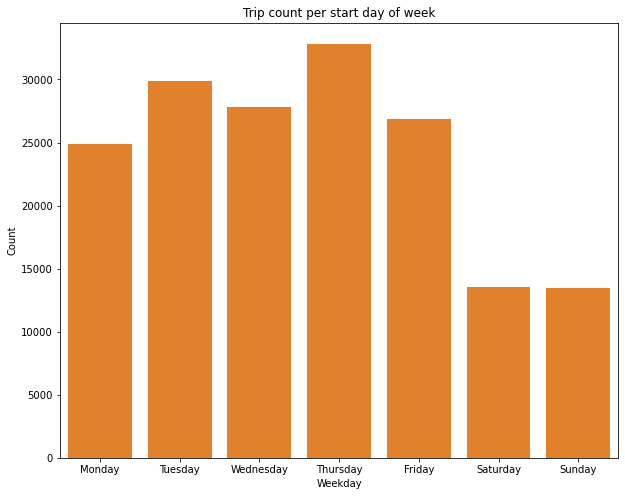

In [25]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cat_type = pd.api.types.CategoricalDtype(week_order,ordered=True)
bike_data_analysis['start_day_of_week'] = bike_data_analysis['start_day_of_week'].astype(cat_type)
base_color = sb.color_palette()[1]
plt.figure(figsize=[10,8])

sb.countplot(data=bike_data_analysis, x='start_day_of_week',color=base_color)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Trip count per start day of week');

## Trip count per start hour of day

Looking at the hour of the time when trips start, two peaks can be seen around the peak times for work commutes. There are also fairly consistent trips per hour between these times.

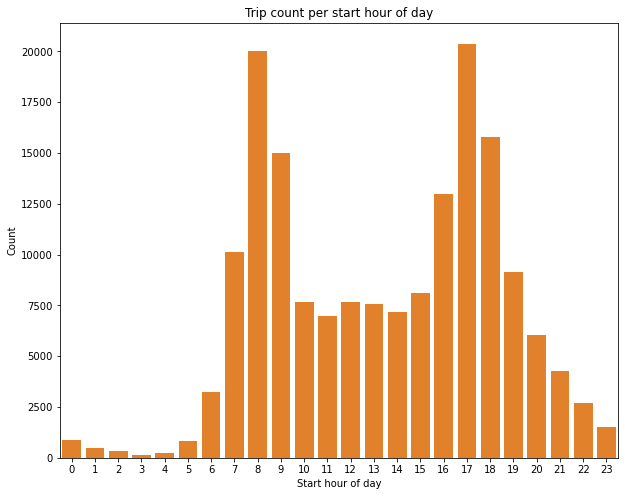

In [26]:
plt.figure(figsize=[10,8])
sb.countplot(data=bike_data_analysis, x='start_hour',color=base_color)
plt.xlabel('Start hour of day')
plt.ylabel('Count')
plt.title('Trip count per start hour of day');

## Combined day and hour trip heatmap
Combining the daily and hourly trip count trends shows the peak hours during the weekdays are where the most trips occur. It can also be seen that weekend trips tend to be later in the day likely due to these times being better for the types of trips occuring on the weekends.

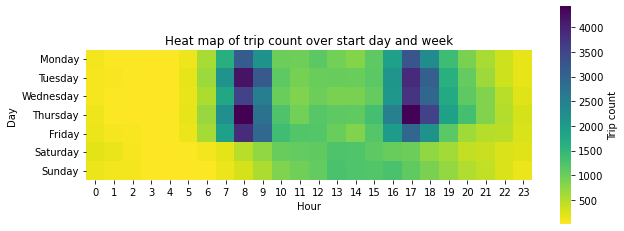

In [27]:
plt.figure(figsize=(10,4))
cat_count = bike_data_analysis.groupby(['start_day_of_week','start_hour']).size()
cat_count = cat_count.reset_index(name='count')
cat_count = cat_count.pivot(index='start_day_of_week', columns='start_hour',values='count')
sb.heatmap(data=cat_count, cbar_kws={'label' : 'Trip count'},square=True,cmap='viridis_r')
plt.title('Heat map of trip count over start day and week')
plt.xlabel('Hour')
plt.ylabel('Day');

## Trip Count for subscribers and customers
There are many more subscribers than customers. It is still worth investigating how the different user types differ in the ways they use the service.

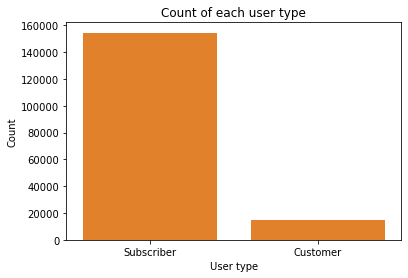

In [28]:
sb.countplot(data=bike_data_analysis, x='user_type', color=base_color);
plt.title('Count of each user type')
plt.xlabel('User type')
plt.ylabel('Count');

## Distribution of trip durations by user type
The violin plot shows how the subscribers have shorter trips with a bit less variation than the customers.

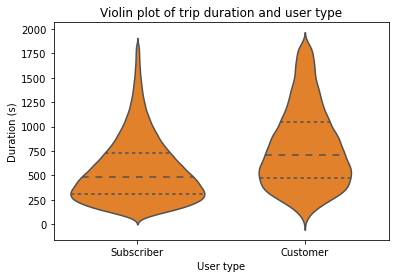

In [29]:
sb.violinplot(data=bike_data_analysis,x='user_type',y='duration_sec',inner='quartile',color=base_color)
plt.title('Violin plot of trip duration and user type')
plt.ylabel('Duration (s)')
plt.xlabel('User type');

## Duration of trips over the week per user type

The plot shows the longer average of customer trips on all days of the week with weekend trips taking longer for this user type. The subscribers have a more consistent lower average trip duration during the week.


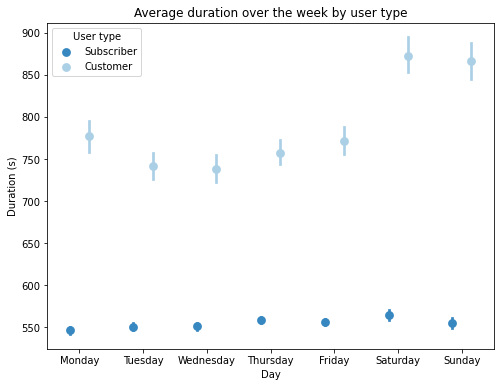

In [30]:
plt.figure(figsize=(8,6))
sb.pointplot(data=bike_data_analysis,x='start_day_of_week',y='duration_sec',hue='user_type',
             linestyles=' ', dodge=0.3, palette='Blues_r')
plt.xlabel('Day')
plt.ylabel('Duration (s)')
plt.legend(title='User type')
plt.title('Average duration over the week by user type');


## Distance of trips over the week per user type

Customers tend to travel between further stations than subscribers during the week with trips going between closer stations on the weekends. These trends seem to indicate that subscribers use the service during the week for work commutes with consistent travel times.

Both user groups having trips between closer stations seems to indicate that this service is used for leisure trips on the weekends which seems logical and that these trips should take longer which is seen mainly with the customer user type.

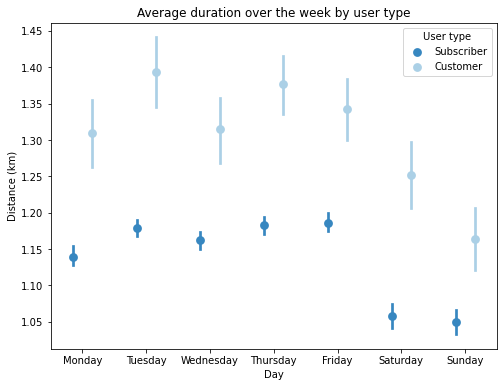

In [31]:
plt.figure(figsize=(8,6))
sb.pointplot(data=bike_data_analysis,x='start_day_of_week',y='distance_km',hue='user_type',
             linestyles=' ', dodge=0.3, palette='Blues_r')
plt.xlabel('Day')
plt.ylabel('Distance (km)')
plt.legend(title='User type');
plt.title('Average duration over the week by user type');

In [32]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 422036 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\lukec\anaconda3\envs\python3.6\Scripts\jupyter-nbconvert-script.py", line 9, in <module>
    sys.exit(main())
  File "C:\Users\lukec\anaconda3\envs\python3.6\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\lukec\anaconda3\envs\python3.6\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\lukec\anaconda3\envs\python3.6\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\lukec\anaconda3\envs\python3.6\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in conv